# ĐỒ ÁN CUỐI KÌ

Bùi Hữu Nghĩa - 1712613

## TỔNG QUAN

Qui trình KHDL:
- Đưa ra câu hỏi
- Thu thập dữ liệu
- Khám phá dữ liệu
- Tiền xử lí
- Phân tích, trả lời câu hỏi

## THU THẬP DỮ LIỆU

Ở đây em có dữ liệu là thông tin về các ứng dụng/trò chơi ở trên Steam  
Steam là nền tảng phân phối game bản quyền trực tuyến lớn nhất hiện nay. Có thể hiểu Steam cũng như 1 trung tâm thương mại chuyên bán các trò chơi trên mạng. Ngoài Steam ra hiện nay còn nhiều nơi khác bán game bản quyền như Origin, Uplay…. Nhưng số lượng ít hơn và không phong phú như Steam.  

<img src="https://venturebeat.com/wp-content/uploads/2019/03/STEAM.jpg?w=1200&strip=all =300x200" alt="drawing" width="500"/>  

Dữ liệu được lấy từ trang [kaggle.com](https://www.kaggle.com)  
Thông tin về dữ liệu tại [đây](https://www.kaggle.com/nikdavis/steam-store-games?select=steam.csv)  
Người sở hữu: Nik Davis  
License: **Attribution 4.0 International (CC BY 4.0)**  
Dữ liệu được tác giả thu thập từ SteamStore và SteamSpy APIs

## KHÁM PHÁ DỮ LIỆU

Trước khi đưa ra câu hỏi để trả lời thì cần phải biết dữ liệu có gì. Vì vậy, đầu tiên ta cần đọc dữ liệu

In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt
import re

Để biểu diễn trực quan dữ liệu, em dùng Dataframe của pandas

### Đọc dữ liệu

In [2]:
games_df = pd.read_csv('steam.csv')

### Số dòng/cột của dữ liệu

In [3]:
games_df.shape

(27075, 18)

Vậy dữ liệu có kích thước là **27075 dòng x 18 cột**  
Dữ liệu lưu trữ thông tin của hơn 27 nghìn app/game, ở đây phần lớn là game nên em sẽ gọi tắt là game   

### Ý nghĩa mỗi dòng

Xem thử thông tin các game trông như thế nào

In [4]:
games_df.head(2)

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
0,10,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,124534,3339,17612,317,10000000-20000000,7.19
1,20,Team Fortress Classic,1999-04-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,3318,633,277,62,5000000-10000000,3.99


Như đã thấy thì mỗi dòng là thông tin của một game

### Thông tin về các cột như sau:  
- **appid**  : là id của ứng dụng
- **name**: tên game
- **release_date**: ngày phát hành
- **english**: ngôn ngữ hỗ trợ, 1 nếu là tiếng anh
- **developer**: nhà phát triển
- **publisher**: nhà phát hành
- **platforms**: nền tảng(game hỗ trợ nền tảng nào, như Window, MAC, Linux)
- **required_age**: độ tuổi yêu cầu
- **categories**: loại trò chơi(yêu cầu) như chơi một hay nhiều người, đa nền tảng,... 
- **genres**: thể loại trò chơi(nội dung) như hành động, chiến thuật,...
- **steamspy_tags**: giống như **genres**
- **achievements**: thành tựu trong game(nếu có)
- **positive_ratings/negative_ratings**: rating của game
- **average_playtime**: thời gian chơi trung bình
- **median_playtime**: trung vị thời gian chơi
- **owners**: số người sở hữu
- **price**: giá game (tính theo bảng Anh, British Pound Sterling - GBP)

Xem thử kiểu dữ liệu của các cột dữ liệu

In [5]:
games_df.dtypes

appid                 int64
name                 object
release_date         object
english               int64
developer            object
publisher            object
platforms            object
required_age          int64
categories           object
genres               object
steamspy_tags        object
achievements          int64
positive_ratings      int64
negative_ratings      int64
average_playtime      int64
median_playtime       int64
owners               object
price               float64
dtype: object

### Chuyển kiểu dữ liệu
Như trên thì hầu hết các cột đều có kiểu dữ liệu phù hợp trừ cột **release_date(ngày phát hành)**. Việc tiếp theo cần làm là chuyển kiểu dữ liệu của **release_date** từ **object** sang **datetime**

In [6]:
games_df['release_date'] = pd.to_datetime(games_df['release_date'], format="%Y-%m-%d")

Kiểm tra lại cột release_date đã đổi kiểu dữ liệu chưa

In [7]:
games_df.dtypes

appid                        int64
name                        object
release_date        datetime64[ns]
english                      int64
developer                   object
publisher                   object
platforms                   object
required_age                 int64
categories                  object
genres                      object
steamspy_tags               object
achievements                 int64
positive_ratings             int64
negative_ratings             int64
average_playtime             int64
median_playtime              int64
owners                      object
price                      float64
dtype: object

Vậy là ta đã đổi kiểu dữ liệu thành công, có thể thao tác tới cột release_date.  
### Miền giá trị các cột dạng numeric/datetime
Bây giờ ta cần tính miền giá trị của các cột dữ liệu có dạng **numeric** hoặc **datetime** như: **appid, release_date, required_age, achievement, positive_ratings, negative_ratings, average_playtime, median_playtime, price**  
Xem mô tả về giá trị các cột

In [8]:
games_df.describe()

,appid,english,required_age,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,price
count,2.707500e+04,27075.000000,27075.000000,27075.000000,2.707500e+04,27075.000000,27075.000000,27075.00000,27075.000000
mean,5.962035e+05,0.981127,0.354903,45.248864,1.000559e+03,211.027147,149.804949,146.05603,6.078193
std,2.508942e+05,0.136081,2.406044,352.670281,1.898872e+04,4284.938531,1827.038141,2353.88008,7.874922
min,1.000000e+01,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.00000,0.000000
25%,4.012300e+05,1.000000,0.000000,0.000000,6.000000e+00,2.000000,0.000000,0.00000,1.690000
50%,5.990700e+05,1.000000,0.000000,7.000000,2.400000e+01,9.000000,0.000000,0.00000,3.990000
75%,7.987600e+05,1.000000,0.000000,23.000000,1.260000e+02,42.000000,0.000000,0.00000,7.190000
max,1.069460e+06,1.000000,18.000000,9821.000000,2.644404e+06,487076.000000,190625.000000,190625.00000,421.990000


Lọc lại, chỉ lấy dòng min và max ta được miền giá trị

In [24]:
value_field = games_df.describe().filter(items=['min', 'max'], axis=0)
value_field

,appid,english,required_age,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,price,revenue
min,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000000e+00
max,1069460.0,1.0,18.0,9821.0,2644404.0,487076.0,190625.0,190625.0,421.99,2.024250e+09


### Các giá trị có thể có của các cột dữ liệu có dạng **categorical**
Các cột có dạng categorical gồm: **platforms, categories, genres, steamspy_tags**

In [46]:
games_df.head(1)

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price,revenue
0,10,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,124534,3339,17612,317,10000000-20000000,7.19,107850000.0


Nhìn qua thì thấy các cột này giá trị có dạng `val1;val2;...`, phân cách với nhau bởi `;`  
Em dùng hàm split để tách các giá trị

In [40]:
# hàm tìm giá trị categories
def categorical_val(col):
    # từ cột dữ liệu, tạo 1 DataFrame dựa trên các dữ liệu có dạng categorical trong đó
    val = games_df[col].str.split(';', expand=True)
    # dùng apply để dùng hàm value_counts của Series cho dataframe vừa tạo
    s = val.apply(pd.Series.value_counts).fillna(0).sum(axis=1)
    # trả về mảng các cate
    return list(s.index)

Tạo 1 dataframe để hiển thị dữ liệu từ các mảng categories

In [36]:
cate_dict = {
    'platforms': categorical_val('platforms'),
    'categories': categorical_val('categories'),
    'genres': categorical_val('genres'),
    'steamspy_tags': categorical_val('steamspy_tags'),
}
cate_df = pd.DataFrame(dict([ (k,pd.Series(v)) for k,v in cate_dict.items() ]))
cate_df.fillna(0)

,platforms,categories,genres,steamspy_tags
0,linux,Captions available,Accounting,1980s
1,mac,Co-op,Action,1990's
2,windows,Commentary available,Adventure,2.5D
3,0,Cross-Platform Multiplayer,Animation & Modeling,2D
4,0,Full controller support,Audio Production,2D Fighter
...,...,...,...,...
334,0,0,0,World War I
335,0,0,0,World War II
336,0,0,0,Wrestling
337,0,0,0,Zombies


### Kiểm tra dữ liệu

In [41]:
games_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27075 entries, 0 to 27074
Data columns (total 19 columns):
appid               27075 non-null int64
name                27075 non-null object
release_date        27075 non-null datetime64[ns]
english             27075 non-null int64
developer           27075 non-null object
publisher           27075 non-null object
platforms           27075 non-null object
required_age        27075 non-null int64
categories          27075 non-null object
genres              27075 non-null object
steamspy_tags       27075 non-null object
achievements        27075 non-null int64
positive_ratings    27075 non-null int64
negative_ratings    27075 non-null int64
average_playtime    27075 non-null int64
median_playtime     27075 non-null int64
owners              27075 non-null object
price               27075 non-null float64
revenue             27075 non-null float64
dtypes: datetime64[ns](1), float64(2), int64(8), object(8)
memory usage: 3.9+ MB


Như trên thì các cột không có giá trị thiếu  
<p style='color: blue'>Vậy, nhìn chung thì dữ liệu khá tốt nên không phải xử lí quá nhiều</p>

## CÁC CÂU HỎI CẦN ĐƯỢC TRẢ LỜI TỪ DỮ LIỆU

Ở đây em đưa ra một số câu hỏi mà mình hứng thú, muốn biết từ dữ liệu này như sau:
- **<span style='color: blue'>So sánh các nền tảng phát hành game</span>**: câu hỏi này cho ta cái nhìn tổng quát về số lượng game được phát hành trên các hệ điều hành window/mac/linux
- **<span style='color: blue'>Game nào có doanh thu cao nhất</span>**: Tìm ra tựa game mang lại nhiều doanh thu nhất trên steam store
- **<span style='color: blue'>Game thể loại nào được chơi nhiều nhất</span>**: Trả lời được câu hỏi này, ta sẽ đánh giá được phần nào thị hiếu của người chơi thông qua các trò chơi
- **<span style='color: blue'>Nhà phát hành game nào có nhiều thành tựu trong game nhất</span>**: Tìm ra nhà phát hành game có nhiều thành tích nhất đạt được trong các game đã phát hành

## TRẢ LỜI CÂU HỎI

### So sánh các nền tảng phát hành game

So sánh thị phần các nền tảng hệ điều hành mà game được phát hành để biết nền tảng nào được phát hành nhiều game nhất, tương quan giữa các nền tảng với nhau

Tạo 1 DataFrame từ cột platforms đã split

In [13]:
platforms_df = games_df['platforms'].str.split(';', expand=True)
platforms_df.sample(5)

,0,1,2
3179,windows,mac,linux
6248,windows,None,None
2675,windows,None,None
12864,windows,None,None
22550,windows,None,None


Dùng pd.Series.value_counts để tính số lượng giá trị

linux       5235.0
mac         8066.0
windows    27070.0
dtype: float64


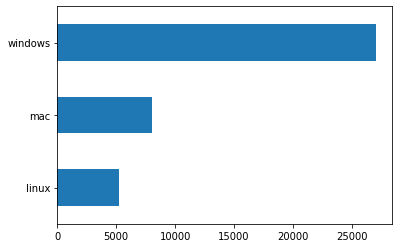

In [50]:
platforms_count = platforms_df.apply(pd.Series.value_counts).fillna(0).sum(axis=1)
print(platforms_count)
platforms_count.sort_values().plot.barh()

Như vậy, với tổng số game là 27075 ở tập dữ liệu này thì:
- Gần như tất cả game đều hỗ trợ nền tảng **window**
- Gần 1/3 số game được phát hành trên **MAC**
- 1/5 số game được phát hành trên **Linux**

Qua trên thì có thể thấy được window là hệ điều hành để chơi game vì có thể cài gần như bất cứ game nào trên steam.  
Bên cạnh đó, trên MAC thì tuy số lượng game được phát hành trên nền tảng này không nhiều như window nhưng ai bảo MAC chơi game không được nào?

### Game nào có doanh thu cao nhất

Ở đây ta sẽ tính doanh thu của từng game rồi chọn ra game có doanh thu cao nhất.  
Tuy nhiên ở tập dữ liệu này, cột **owners** tức người sỡ hữu chỉ là ước tính, có dạng `lower_bound:upper_bound`. Nghĩa là, số người mua sẽ dao động trong khoảng **lớn hơn lower và nhỏ hơn upper**. Giả sử số người mua là trung bình của lower và upper thì doanh thu của game sẽ là: $$revenue = (lower + upper) / 2 * price$$

**Các bước thực hiện:**
- Tạo cột doanh thu
- Viết hàm tính trung bình, trong cột **owners** có dạng lower-upper nên em dùng split để tách ra rồi tính trung bình từ đó
- apply hàm tính trung bình vào cột doanh thu (revenue), lúc này ta được cột doanh thu là số người mua trung bình
- Nhân cột doanh thu với cột price ta sẽ được doanh thu
- Tìm hàng nào có doanh thu cao nhất, đó là game có doanh thu cao nhất

In [43]:
# tạo cột doanh thu
games_df['revenue'] = games_df['owners']

# hàm tách giá trị từ owner rồi tính trung bình
def cal_average(owner): 
    arr = owner.split('-')
    return np.mean([int(arr[0]), int(arr[1])])

# apply hàm ở trên vào cột revenue ta được cột revenue có giá trị là trung bình của lower và upper trong owners
games_df['revenue'] = games_df['revenue'].apply(cal_average)

# nhân cột revenue với cột price ta được doanh thu tính theo bảng Anh
games_df['revenue'] = games_df['revenue'] * games_df['price']

# tìm dòng có revenue lớn nhất
games_df.loc[games_df['revenue'] == max(games_df['revenue'])]

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price,revenue
12836,578080,PLAYERUNKNOWN'S BATTLEGROUNDS,2017-12-21,1,PUBG Corporation,PUBG Corporation,windows,0,Multi-player;Online Multi-Player;Stats,Action;Adventure;Massively Multiplayer,Survival;Shooter;Multiplayer,37,496184,487076,22938,12434,50000000-100000000,26.99,2.024250e+09


In [16]:
games_df.iloc[12836, 18]

2024250000.0

Vậy game có doanh thu cao nhất là **PLAYERUNKNOWN'S BATTLEGROUNDS** với doanh thu khoảng $2,024,250,000$ bảng Anh 

<img src="https://upload.wikimedia.org/wikipedia/vi/thumb/d/d0/Pubgps4.jpg/800px-Pubgps4.jpg" alt="drawing" width="200"/>  
PUBG là game sinh tồn hot nhất năm 2018. Trong trò chơi, sẽ có tối đa một trăm người chơi (bao gồm cả Bot Players - những người chơi ảo được điều khiển tự động bởi trí tuệ nhân tạo) sẽ nhảy dù xuống một hòn đảo lớn. Người chơi sau đó phải nhanh chóng nhặt đồ dùng, vũ khí, phương tiện di chuyển và các trang thiết bị cần thiết để có thể sinh tồn, kết hợp với việc tiêu diệt những người chơi khác và tránh bị người khác giết.

### Các thể loại game nào được chơi nhiều nhất

Tìm ra thể loại game được nhiều người chơi nhất

Tính tổng thời gian chơi trung bình của từng thể loại game (genres) để tìm ra thể loại được chơi nhiều nhất  

Xử lí:
- Tạo 1 dict chứa tên thể loại và tổng thời gian chơi trung bình  
- Duyệt từng dòng 
- Ở từng dòng, split genres rồi cập nhật vào dict các giá trị tương ứng như tên genre, average_playtime

In [17]:
genres_times = {} # dict chứa tên thể loại và thời gian chơi
for i in range(len(games_df)): # duyêt từng dòng
    # vì genres có dạng genres1;genres2;... nên split nó ra
    genres = games_df['genres'][i].split(';')
    for genre in genres:
        if genre not in genres_times:
            genres_times[genre] = games_df['average_playtime'][i]
        else:
            genres_times[genre] += games_df['average_playtime'][i]
            
# sort giảm dần theo value
genres_times = sorted(genres_times.items(), key = lambda item: item[1], reverse = True)

Tạo 1 dataframe để hiển thị cho dễ nhìn

In [45]:
genres = []
times = []
for genre in genres_times:
    genres.append(genre[0])
    times.append(genre[1])
genres_times_df = pd.DataFrame({
    'genres': genres,
    'average_play_time': times
})
genres_times_df

,genres,average_play_time
0,Indie,2191390
1,Action,1714230
2,Adventure,1521420
3,RPG,1194086
4,Strategy,1013354
5,Free to Play,944762
6,Casual,868603
7,Simulation,801127
8,Massively Multiplayer,524525
9,Early Access,240163


Như trên thì **Indie** là thể loại game phổ biến nhất. Game Indie là các tựa game được phát triển bởi những cá nhân hoặc một nhóm người rất bình thường và có niềm đam mê với game. Những dòng game indie thường tập trung vào gameplay, cách thể hiện nhân vật chứ không phải đồ họa. Vì vậy nên ở đây, **Indie** chưa đúng là một thể loại hay lối chơi game lắm. Ngoài Indie ra thì còn có một số thể loại phổ biến khác như  **Action, Adventure, RPG,...**

### Nhà phát triển game nào có nhiều thành tựu trong game nhất

Tìm ra nhà phát triển game đạt được nhiều thành tựu nhất trong game

Cách xử lí:
- Tạo 1 dict rỗng để chứa thông tin nhà phát triển (developer) và số thành tựu (achievements) họ đạt được
- Duyệt games_df để cập nhật giá trị tương ứng cho dict
- Sắp xếp dict giảm dần theo giá trị (tổng số achievements)
- Lấy ra giá trị đầu tiên - có achievements cao nhất

In [19]:
achievements_count = {}
for i in range(len(games_df['achievements'])):
    developer = games_df.loc[i, 'developer']
    if developer not in achievements_count:
        achievements_count[developer] = games_df.loc[i, 'achievements']
    else:
        achievements_count[developer] += games_df.loc[i, 'achievements']

In [20]:
# sort giảm dần theo value
achievements_count = sorted(achievements_count.items(), key = lambda item: item[1], reverse = True)

# giá trị đầu tiên trong mảng là giá trị lớn nhất
achievements_count[0]

('Ripknot Systems', 190196)

Vậy nhà phát triển Ripknot Systems có nhiều thành tựu trong game nhất (190196)

## NHÌN LẠI QUÁ TRÌNH THỰC HIỆN

Khó khăn gặp phải:
- Hơi mất thời gian để tìm được dữ liệu phù hợp
- Đặt ra các câu hỏi sao cho vừa có ích, vừa nằm trong khả năng xử lí
- Cách trình bày nội dung sao cho trực quan, người khác dễ hiểu

Đã học được:
- Các bước trong một quy trình làm khoa học dữ liệu
- Cách dùng các thư viện python để phục vụ quá trình xử lí, khai thác thông tin
- Biết thêm về kaggle

Nếu có thêm thời gian em sẽ khai thác thêm dữ liệu bằng cách đặt ra thêm các câu hỏi

## TÀI LIỆU THAM KHẢO

- [kaggle.com](https://www.kaggle.com/) để lấy dữ liệu
- Thư viện [Pandas](https://pandas.pydata.org/pandas-docs/stable/index.html)
- Các demo của thầy trong môn LTCKHDL